In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 22, 7

In [12]:
import numpy as np 
import pandas as pd 
from fbprophet import Prophet 
import pandas_datareader as data

In [43]:
df = data.DataReader('AMZN', 'yahoo', '1997-05-15', '2021-08-03')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-05-15,2.500000,1.927083,2.437500,1.958333,72156000.0,1.958333
1997-05-16,1.979167,1.708333,1.968750,1.729167,14700000.0,1.729167
1997-05-19,1.770833,1.625000,1.760417,1.708333,6106800.0,1.708333
1997-05-20,1.750000,1.635417,1.729167,1.635417,5467200.0,1.635417
1997-05-21,1.645833,1.375000,1.635417,1.427083,18853200.0,1.427083
...,...,...,...,...,...,...
2021-07-28,3658.419922,3601.000000,3633.780029,3630.320068,2999400.0,3630.320068
2021-07-29,3637.949951,3580.010010,3627.750000,3599.919922,5520000.0,3599.919922
2021-07-30,3368.139893,3306.979980,3347.949951,3327.590088,9957100.0,3327.590088


In [44]:
df = df.reset_index()
df_input = df[['Date', 'Close']]
df_input

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083
...,...,...
6090,2021-07-28,3630.320068
6091,2021-07-29,3599.919922
6092,2021-07-30,3327.590088
6093,2021-08-02,3331.479980


In [45]:
df_input.columns  = ['ds', 'y']
df_input

,ds,y
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083
...,...,...
6090,2021-07-28,3630.320068
6091,2021-07-29,3599.919922
6092,2021-07-30,3327.590088
6093,2021-08-02,3331.479980


In [116]:
m = Prophet(interval_width=0.95, weekly_seasonality=True)
model = m.fit(df_input)
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-05-15,-6.991986,-281.210868,239.296438,-6.991986,-6.991986,-3.598201,-3.598201,-3.598201,-1.123458,-1.123458,-1.123458,-2.474743,-2.474743,-2.474743,0.0,0.0,0.0,-10.590187
1,1997-05-16,-6.913487,-280.030232,252.231125,-6.913487,-6.913487,-6.623553,-6.623553,-6.623553,-3.382059,-3.382059,-3.382059,-3.241494,-3.241494,-3.241494,0.0,0.0,0.0,-13.537040
2,1997-05-19,-6.677990,-256.931037,256.765887,-6.677990,-6.677990,-7.817743,-7.817743,-7.817743,-2.922594,-2.922594,-2.922594,-4.895149,-4.895149,-4.895149,0.0,0.0,0.0,-14.495733
3,1997-05-20,-6.599491,-265.820636,241.214747,-6.599491,-6.599491,-6.242223,-6.242223,-6.242223,-1.037740,-1.037740,-1.037740,-5.204484,-5.204484,-5.204484,0.0,0.0,0.0,-12.841714
4,1997-05-21,-6.520992,-243.603203,223.327561,-6.520992,-6.520992,-5.905688,-5.905688,-5.905688,-0.519641,-0.519641,-0.519641,-5.386047,-5.386047,-5.386047,0.0,0.0,0.0,-12.426680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,2021-11-07,3383.145679,3127.054443,3625.785468,3376.106876,3388.226053,-4.710643,-4.710643,-4.710643,4.492747,4.492747,4.492747,-9.203389,-9.203389,-9.203389,0.0,0.0,0.0,3378.435036
6191,2021-11-08,3384.636831,3126.522626,3626.266308,3377.402200,3389.773999,-12.382045,-12.382045,-12.382045,-2.922594,-2.922594,-2.922594,-9.459451,-9.459451,-9.459451,0.0,0.0,0.0,3372.254786
6192,2021-11-09,3386.127983,3119.294748,3631.047037,3378.700836,3391.321946,-10.698468,-10.698468,-10.698468,-1.037740,-1.037740,-1.037740,-9.660728,-9.660728,-9.660728,0.0,0.0,0.0,3375.429515
6193,2021-11-10,3387.619135,3135.767363,3620.852254,3380.000885,3392.889576,-10.329776,-10.329776,-10.329776,-0.519641,-0.519641,-0.519641,-9.810134,-9.810134,-9.810134,0.0,0.0,0.0,3377.289360


In [117]:
forecast[['ds', 'yhat']].tail()

,ds,yhat
6190,2021-11-07,3378.435036
6191,2021-11-08,3372.254786
6192,2021-11-09,3375.429515
6193,2021-11-10,3377.289360
6194,2021-11-11,3378.075531


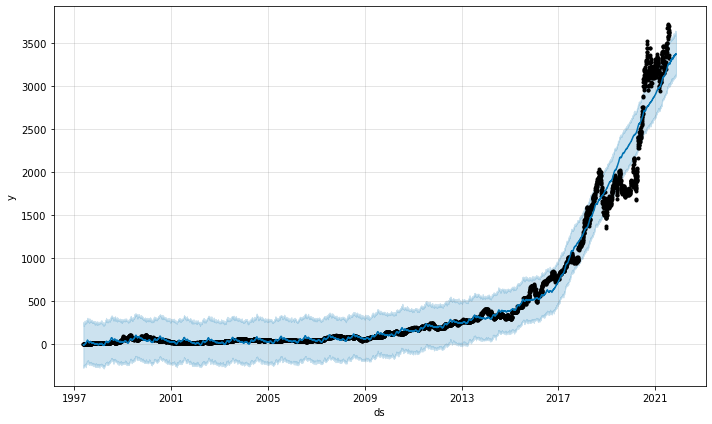

In [118]:
plot1 = m.plot(forecast)

In [119]:
forecast_100days = forecast[forecast['ds'] > '2021-08-03']
forecast_100days = forecast_100days[['ds', 'yhat']]
forecast_100days

,ds,yhat
6095,2021-08-04,3261.844837
6096,2021-08-05,3261.402521
6097,2021-08-06,3259.469297
6098,2021-08-07,3267.846798
6099,2021-08-08,3268.536574
...,...,...
6190,2021-11-07,3378.435036
6191,2021-11-08,3372.254786
6192,2021-11-09,3375.429515
6193,2021-11-10,3377.289360


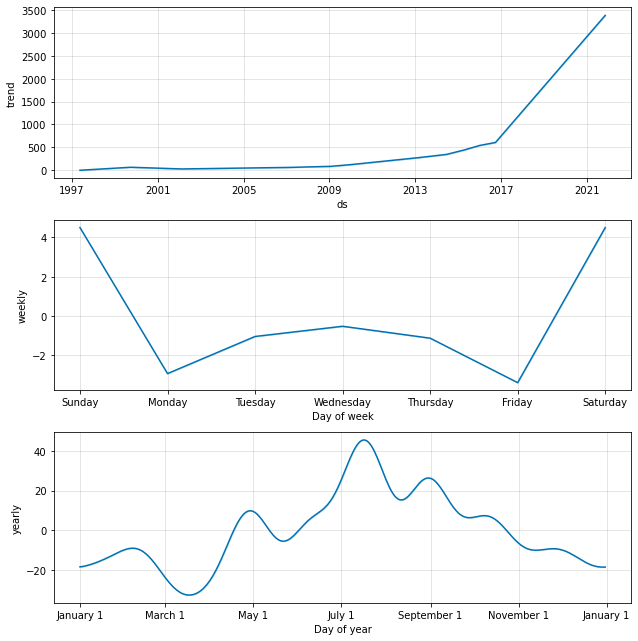

In [120]:
plot2 = m.plot_components(forecast)

In [121]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [122]:
df_test = data.DataReader('AMZN', 'yahoo', '2021-08-04', '2021-12-24')
df_test

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-04,3388.879883,3345.560059,3379.350098,3354.719971,2183900,3354.719971
2021-08-05,3389.000000,3340.919922,3356.219971,3375.989990,2433500,3375.989990
2021-08-06,3375.000000,3329.040039,3375.000000,3344.939941,2635300,3344.939941
2021-08-09,3354.879883,3328.520020,3343.610107,3341.870117,2148200,3341.870117
2021-08-10,3358.000000,3315.000000,3345.010010,3320.679932,2412600,3320.679932
...,...,...,...,...,...,...
2021-12-17,3417.969971,3312.270020,3354.209961,3400.350098,4277100,3400.350098
2021-12-20,3357.489990,3312.000000,3337.000000,3341.580078,2868600,3341.580078
2021-12-21,3414.330078,3312.949951,3357.010010,3408.340088,2797800,3408.340088


In [123]:
true_values = df_test[['Close']]
#forecast_100days  = forecast_100days.set_index('ds')
forcasted_values = forecast_100days.set_index('ds')
from sklearn.metrics import r2_score, mean_absolute_error
print(len(true_values), len(forcasted_values))
print(r2_score(true_values.values, forcasted_values.values), mean_absolute_error(true_values.values, forcasted_values.values))

100 100
-0.3092741694890564 97.79157483497634


In [124]:
forcasted_values

,yhat
ds,
2021-08-04,3261.844837
2021-08-05,3261.402521
2021-08-06,3259.469297
2021-08-07,3267.846798
2021-08-08,3268.536574
...,...
2021-11-07,3378.435036
2021-11-08,3372.254786
2021-11-09,3375.429515


In [125]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

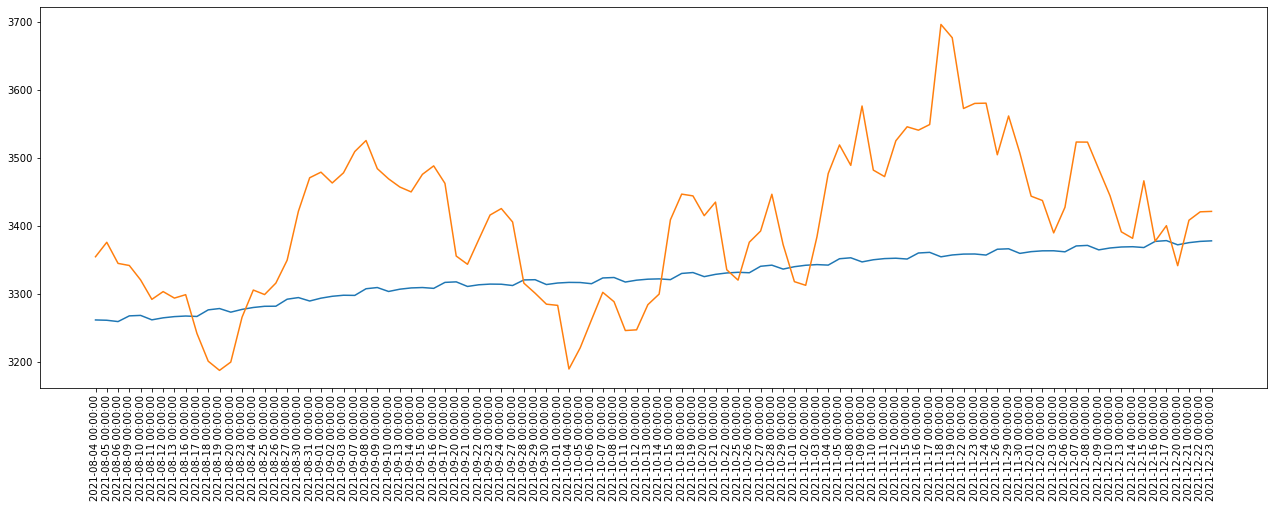

In [126]:
plt.plot(forcasted_values.values)
plt.plot(true_values.values)
plt.xticks(np.arange(0,100), labels=true_values.index, rotation='vertical');

In [129]:
df_test = data.DataReader('AMZN', 'yahoo', '2021-07-02', '2021-12-24')
df_test = df_test[['Close']]
df_test

,Close
Date,
2021-07-02,3510.979980
2021-07-06,3675.739990
2021-07-07,3696.580078
2021-07-08,3731.409912
2021-07-09,3719.340088
...,...
2021-12-17,3400.350098
2021-12-20,3341.580078
2021-12-21,3408.340088


In [130]:
ls = [12,3,2,7,8,9,10]
ls[-5:]

[2, 7, 8, 9, 10]